# Assignment 2 - CNN

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

## Part I

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.6596 - loss: 0.9424 - val_accuracy: 0.8431 - val_loss: 0.4321
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.8307 - loss: 0.4707 - val_accuracy: 0.8712 - val_loss: 0.3509
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8627 - loss: 0.3889 - val_accuracy: 0.8828 - val_loss: 0.3161
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.8789 - loss: 0.3390 - val_accuracy: 0.8849 - val_loss: 0.3025
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8868 - loss: 0.3142 - val_accuracy: 0.8951 - val_loss: 0.2815
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.8928 - loss: 0.2981 - val_accuracy: 0.8959 - val_loss: 0.2759
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9005 - loss: 0.2778 - val_accuracy: 0.9044 - val_loss: 0.2583
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9012 - loss: 0.2681 - 

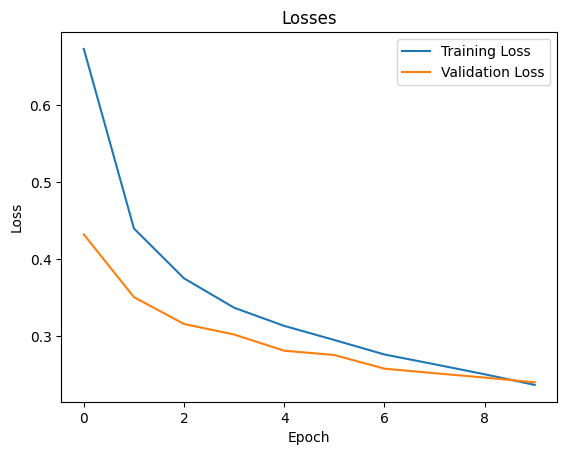

In [17]:
# Loading data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training set into training and validation sets
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Part II

#### In order to improve the model, we will add more layers to the model and increase the number of filters.

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 74ms/step - accuracy: 0.7029 - loss: 0.8262 - val_accuracy: 0.8561 - val_loss: 0.3841
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 85ms/step - accuracy: 0.8566 - loss: 0.3950 - val_accuracy: 0.8782 - val_loss: 0.3270
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.8798 - loss: 0.3271 - val_accuracy: 0.8868 - val_loss: 0.2990
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.8936 - loss: 0.2930 - val_accuracy: 0.8946 - val_loss: 0.2768
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.9034 - loss: 0.2684 - val_accuracy: 0.8974 - val_loss: 0.2728
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 85ms/step - accuracy: 0.9089 - loss: 0.2482 - val_accuracy: 0.9088 - val_loss: 0.2463
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.9155 - loss: 0.2312 - val_accuracy: 0.9005 - val_loss: 0.2659
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.9196 - loss: 0.2176 - 

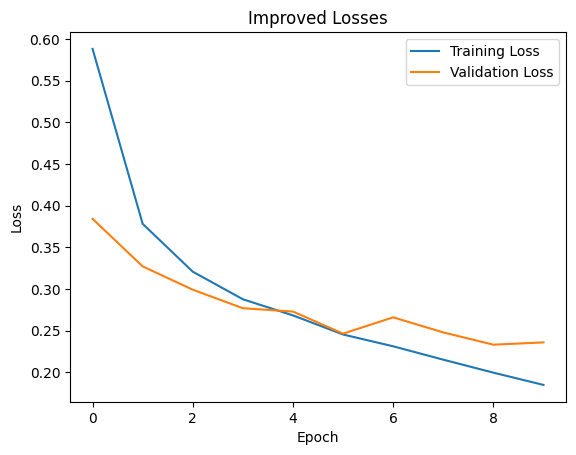

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689,568 (10.26 MB)

 Trainable params: 896,522 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,793,046 (6.84 MB)

In [18]:
improved_model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

improved_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
improved_history = improved_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128)

# Evaluate the improved model
improved_test_loss, improved_test_accuracy = improved_model.evaluate(x_test, y_test)

# Print improved results
print(f"Improved Test Loss: {improved_test_loss}")
print(f"Improved Test Accuracy: {improved_test_accuracy}")

plt.plot(improved_history.history['loss'], label='Training Loss')
plt.plot(improved_history.history['val_loss'], label='Validation Loss')
plt.title('Improved Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.show()

# Model summary
improved_model.summary()


## Conclusion

The second model is slightly better due to its increased complexity but is important to consider as well the training time when deciding between the model since the improved one is more of the double of time for training